# 연속형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### ```scipy.integrate```
### ```integrate()``` : 적분

In [3]:
from scipy import integrate
import warnings

- 적분에 관한 warning을 출력하지 않도록 한다

In [4]:
warnings.filterwarnings('ignore',
                        category = integrate.IntegrationWarning)

### 
## 1차원 연속형 확률변수

### 
### 1차원 연속형 확률변수
- **확률변수가 어느 구간에 들어가는 확률을 정의**

### 
### 확률밀도함수 (PDF, 밀도함수)
- 확률변수가 취할 수 있는 값은 구간 [a, b]로 정의
- 밀도함수는 확률함수에 가깝지만, **$f(x) = P(X = x)$**는 되지 않는다

### $P(x_0 \leq X \leq x_1) = \int_{x_0}^{x_1} f(x) dx$

In [5]:
x_range = np.array([0, 1])

#### $f(x) = $

$\begin{cases}
2x \; if \;\; (0 \leq x \leq 1)\\
0 \; if \;\; (otherwise)
\end{cases}$

In [6]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

- 확률변수 X 정의

In [16]:
X = [x_range, f]
x_range, X

(array([0, 1]), [array([0, 1]), <function __main__.f(x)>])

#### 
### 밀도함수 시각화 
### ```ax.fill_between()``` : 둘러쌓인 영역에 색을 채움
### ```ax.hlines(x, xmin, xmax)``` : 그래프 수평선 생성
### ```ax.vlines(y, ymin, ymax)``` : 그래프 수직선 생성

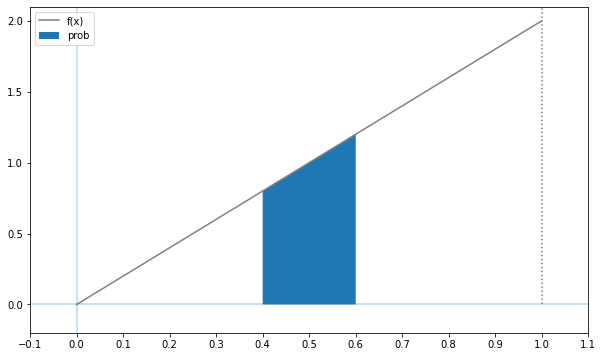

In [23]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(x_range[0], x_range[1], 100)
ax.plot(xs, [f(x) for x in xs], label='f(x)', color = 'gray')
ax.hlines(0, -0.2, 1.2, alpha = 0.3)
ax.vlines(0, -0.2, 2.2, alpha = 0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles = ':', color = 'gray')

# 0.4부터 0.6 까지 xs의 범위로 f(x)와, x축으로 둘러싸인 영역을 진하게 칠함
xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label = 'prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)

ax.legend()

plt.show()

### 
### $P(0.4 \leq X \leq 0.6) = \int_{0.4}^{0.6} 2x dx$
### ```integrate.quad()``` : 함수의 적분 계산
- 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위

In [24]:
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

- **첫 번째 반환값이 적분값 => 확률변수 X가 0.4와 0.6사이 구간에 들어갈 확률이 0.2**

### 
### 확률의 성질
### $f(x) \geq 0$
### $\int_{-\infty}^{\infty} f(x) dx = 1$

### 
### ```scipy.optimize```
### ```minimize_scalar()``` : 함수의 최솟값을 계산

In [27]:
from scipy.optimize import minimize_scalar

In [29]:
res = minimize_scalar(f)

- 함수의 최솟값은 fun이라는 인스턴스 변수에

In [30]:
res.fun

0

- 전체 면적의 합이 1이됨을 확인

In [32]:
integrate.quad(f, -np.inf, np.inf)

(1.000, 0.000)

### 
### 누적분포함수 (CDF, 분포함수) : 확률변수 X가 x이하가 될 때의 확률을 반환

### $F(x) = P(X \leq x) = \int_{- \infty}^{\infty} f(x) dx$

#### $P(0.4 \leq 0.6) = F(0.6) - F(0.4)$

In [33]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [34]:
F(0.6) - F(0.4)

0.200

### 
### 분포함수 시각화
- 단조증가함수 (x가 증가할 때 y는 감소하지 않음)

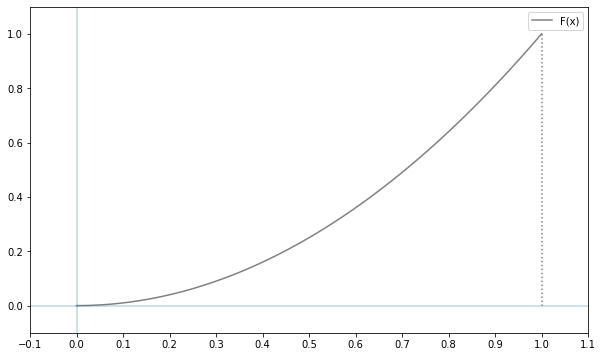

In [35]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(x_range[0], x_range[1], 100)
ax.plot(xs, [F(x) for x in xs], label = 'F(x)', color = 'gray')
ax.hlines(0, -0.1, 1.1, alpha = 0.3)
ax.vlines(0, -0.1, 1.1, alpha = 0.3)
ax.vlines(xs.max(), 0, 1, linestyles = ':', color = 'gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.legend()

plt.show()

### 
### 확률변수의 변환

### $g(y) =$

$\begin{cases}
{{(y-3)} \over 2} \; if \;\; (3 \leq y \leq 5)\\
0 \; if \;\; (otherwise)
\end{cases}$

### $G(y) = P(Y \leq y) = \int^{y}_{-\infty} g(y) dy$

In [36]:
y_range = [3, 5]

In [38]:
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0

In [39]:
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

### 
### 분포함수와 밀도함수 시각화

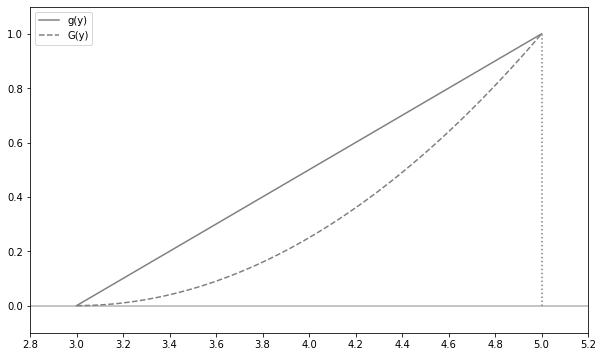

In [14]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ys = np.linspace(y_range[0], y_range[1], 100)
ax.plot(ys, [g(y) for y in ys],
        label = 'g(y)', color = 'gray')
ax.plot(ys, [G(y) for y in ys],
        label = 'G(y)', ls = '--', color = 'gray')
ax.hlines(0, 2.8, 5.2, alpha = 0.3)
ax.vlines(ys.max(), 0, 1, linestyles = ':', color = 'gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)

ax.legend()

plt.show()

### 
### 1차원 연속형 확률분포의 지표

### 기댓값
### $\mu = E(X) = \int^{\infty}_{-\infty} x f(x) dx$

In [43]:
def integrand(x):
    return x * f(x)

In [44]:
integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

### 
### 연속형 확률변수의 기댓값
### $E(g(X)) = \int_{-\infty}^{\infty} g(x) f(x) dx$
#### $E(Y) = E(2X + 3) = \int_{\infty}^{\infty} (2X + 3) f(x) dx$

In [48]:
def E(X, g = lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

- g에 아무것도 지정하지 않으면 X의 기댓값을 계산

In [49]:
E(X)

0.667

In [50]:
E(X, g = lambda x: 2*x+3)

4.333

In [51]:
2 * E(X) + 3

4.333

### 
### 분산
### $\sigma^2 = V(X) = \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx$

In [52]:
mean = E(X)

In [57]:
def integrand(x):
    return (x - mean) ** 2 * f(x)

In [58]:
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

### 연속형 확률변수의 분산
### $V(g(X)) = \int_{-\infty}^{\infty}(g(x) - E(g(X)))^2 f(x) dx$

#### $V(Y) = V(2X + 3) = \int_{-\infty}^{\infty} ((2X+3)-\mu)^2 f(x) dx$

In [63]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

- g를 지정하지 않으면, 확률변수 X의 분산을 계산

In [64]:
V(X)

0.056

In [65]:
V(X, lambda x: 2 * x + 3)

0.222

In [62]:
2**2 * V(X)

0.222

### 
## 2차원 연속형 확률분포

### 2차원 연속형 확률변수의 정의
### 

### 결합확률밀도함수

### 2차형 연속형 확률함수  $f(x, y)$의 정의역 $\{(x,y) | a\leq x \leq b ; c\leq y\leq d \}$

###  $P(x_0 \leq X \leq x_1, y_0 \leq Y \leq y_1) = \int_{x_0}^{x_1} \int_{y_0}^{y_1} f(x, y) dxdy$

### 
### 확률의 성질

### $f(x, y) \geq 0, \;\;\;\;\; \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \; dxdy = 1$ 

#### 
#### $f(x, y) =$

$\begin{cases}
4y(x-y) \;\;  \;\; (0 \leq y \leq 1 \;\; 및 \;\; 0 \leq x-y \leq 1)\\
0 \;\; \;\; (otherwise)
\end{cases}$

#### $\{0 \leq X \leq 2, \;\; 0 \leq Y \leq 1 \}$


In [73]:
x_range = [0, 2]
y_range = [0, 1]
x_range, y_range

([0, 2], [0, 1])

In [75]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [76]:
XY = [x_range, y_range, f_xy]
XY

[[0, 2], [0, 1], <function __main__.f_xy(x, y)>]

### 
### 결합확률밀도함수 히트맵 생성

In [84]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])
pd.shape

(200, 200)

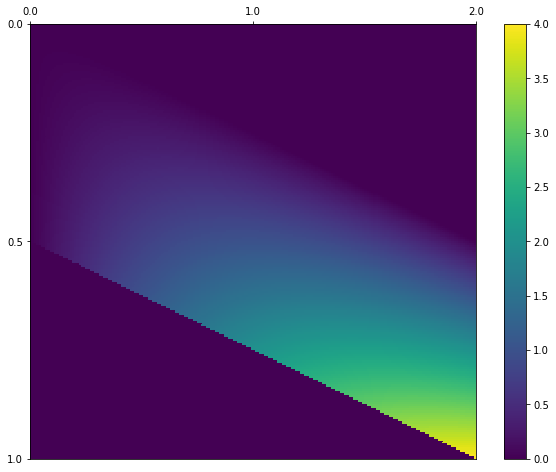

In [85]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)

ax.set_xticks(np.linspace(0, 200, 3), minor = False)
ax.set_yticks(np.linspace(0, 200, 3), minor = False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))

ax.invert_yaxis()

ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)
plt.show()

### 
### ```integrate.nquad()``` : 다중적분
- 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
- X와 Y의 전체구간에 대한 적분값이 1이 됨을 확인

In [86]:
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.000

### 
### 주변확률밀도함수
### 확률변수 X의 주변확률밀도함수 $f_X(x) = \int^{\infty}_{-\infty} f(x, y) \; dy$

### 
### ```functools.partial()``` : 다중적분시 일부를 고정한 새로운 함수 생성

In [87]:
from functools import partial

#### X와 Y의 주변확률밀도함수

In [88]:
def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]

In [91]:
def f_Y(y):
    return integrate.quad(partial(f_xy, y = y), -np.inf, np.inf)[0]

In [90]:
X = [x_range, f_X]
Y = [y_range, f_Y]
X, Y

([[0, 2], <function __main__.f_X(x)>], [[0, 1], <function __main__.f_Y(y)>])

### 
### 밀도함수 그래프 생성

In [93]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

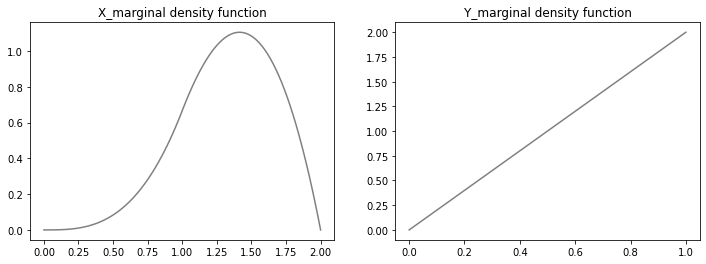

In [94]:
fig = plt.figure(figsize = (12, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color = 'gray')
ax2.plot(ys, [f_Y(y) for y in ys], color = 'gray')

ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### 
### ２차원 연속형 확률변수의 지표

### 기댓값
### $\mu_X = E(X) = \int^{\infty}_{-\infty} \int^{\infty}_{-\infty} x f(x, y) \;dxdy $

In [95]:
def integrand(x, y):
    return x * f_xy(x, y)

In [96]:
integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.333

### 
### $E(g(X, Y)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} g(x, y) f(x, y) \; dxdy$

In [97]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

#### X와 Y의 기댓값

In [98]:
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [99]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

#### $E(2X + 3Y) = 2E(X) + 3E(Y)$

In [100]:
a, b = 2, 3

In [101]:
E(XY, lambda x, y: a * x + b * y)

4.667

In [102]:
a * mean_X + b * mean_Y

4.667

### 
### 분산
### $\sigma_X^2 = V(X) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x-\mu_X)^2 f(x, y) \; dxdy$

In [103]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

In [104]:
integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.111

### 연속형 확률변수의 분산
### $V(g(X, Y)) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (g(x, y) - E(g(X, Y)))^2 f(x, y) \; dxdy$

In [105]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

#### X와 Y의 분산

In [107]:
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [108]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

###
### 공분산

### $\sigma_{XY} = Cov(X, Y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} (x-\mu_X)(y-\mu_Y) f(x, y) \; dx dy$

In [109]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    
    def integrand(x, y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [110]:
cov_xy = Cov(XY)
cov_xy

0.056

#### $V(2X + 3Y) = 4V(X) + 9V(Y) + 12Cov(X, Y)$

In [111]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [112]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

### 
### 상관계수

In [113]:
cov_xy / np.sqrt(var_X * var_Y)

0.707